In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr

Trying to get the correct forcing to match Reynolds number

In [2]:
!python ./lbm.py --help

usage: lbm.py [-h] [--omega OMEGA] [--force FORCE] [--wx WX] [--nt NT]

optional arguments:
  -h, --help     show this help message and exit
  --omega OMEGA  relaxation parameter, between [0, 2]
  --force FORCE  external forcing in x direction
  --wx WX        width of the narrowing in region, between [0, 60]
  --nt NT        total number of time steps


In [3]:
!python ./lbm.py --force 1e-8 --nt 8000 --wx 30

Arguments: Namespace(force=1e-08, nt=8000, omega=1.0, wx=30)
Important parameters:
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_w30_omega1.0_force1e-08_nt8000.nc


In [4]:
ds = xr.open_dataset('lbm_w30_omega1.0_force1e-08_nt20000.nc')
ds

<xarray.Dataset>
Dimensions:  (x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
Data variables:
    ux       (y, x) float64 ...
    uy       (y, x) float64 ...
    rho      (y, x) float64 ...
    p        (y, x) float64 ...

In [5]:
ds['ux'].isel(x=0).mean()  # correct magnitude

<xarray.DataArray 'ux' ()>
array(2.997801e-05)
Coordinates:
    x        float64 1.0

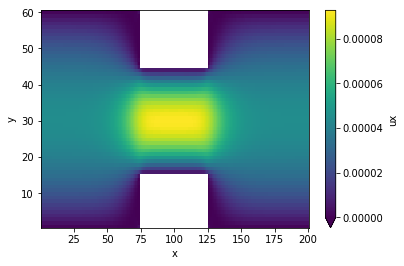

In [7]:
ds['ux'].plot(vmin=0)